In [ ]:
#set working directory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px

%matplotlib inline
pd.set_eng_float_format(accuracy=3, use_eng_prefix=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

plt.rc('figure', figsize=(10, 6)) #size of the figure
np.set_printoptions(precision=4, suppress=True) #precision set

In [ ]:
#define the path
path = '/content/drive/MyDrive/MSSP_607/Assignment/Case Study Report Assignment2/Copy of Copy of Internet Sales.csv'

In [ ]:
df = pd.read_csv(path, parse_dates=['BirthDate','DateFirstPurchase','OrderDate','DueDate','ShipDate'],low_memory=False,index_col='ID')

In [ ]:
#have a prelimiary view of the dataset
df

,CustomerKey,GeographyKey,City,CountryRegionCode,EnglishCountryRegionName,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
ID,,,,,,,,,,,,,,,,,,,,,
0,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,...,1912.15,1912.15,3399.99,272.00,85.00,NaN,NaN,2011-01-19,2011-01-31,2011-01-26
1,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,...,1265.62,1265.62,2319.99,185.60,58.00,NaN,NaN,2013-01-18,2013-01-30,2013-01-25
2,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,...,8.22,8.22,21.98,1.76,0.55,NaN,NaN,2013-01-18,2013-01-30,2013-01-25
3,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,...,1481.94,1481.94,2384.07,190.73,59.60,NaN,NaN,2013-05-03,2013-05-15,2013-05-10
4,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,...,10.84,10.84,28.99,2.32,0.72,NaN,NaN,2013-05-03,2013-05-15,2013-05-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60393,29480,248,London,GB,United Kingdom,AW00029480,NaN,Nina,W,Raji,...,13.09,13.09,34.99,2.80,0.87,NaN,NaN,2013-07-17,2013-07-29,2013-07-24
60394,29480,248,London,GB,United Kingdom,AW00029480,NaN,Nina,W,Raji,...,6.92,6.92,8.99,0.72,0.22,NaN,NaN,2013-07-17,2013-07-29,2013-07-24
60395,29481,120,Hof,DE,Germany,AW00029481,NaN,Ivan,NaN,Suri,...,1898.09,1898.09,3374.99,270.00,84.37,NaN,NaN,2011-08-13,2011-08-25,2011-08-20


QUESTION #1
What are the Internet sales of AdventureWorks by year for each Country Region?

In [ ]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])   #extract the year from the date format # Convert the 'OrderDate' column to a datetime format if it's not already
df['Year'] = df['OrderDate'].dt.year

In [ ]:
df

,CustomerKey,GeographyKey,City,CountryRegionCode,EnglishCountryRegionName,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,...,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate,Year
ID,,,,,,,,,,,,,,,,,,,,,
0,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,...,1912.15,3399.99,272.00,85.00,NaN,NaN,2011-01-19,2011-01-31,2011-01-26,2011
1,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,...,1265.62,2319.99,185.60,58.00,NaN,NaN,2013-01-18,2013-01-30,2013-01-25,2013
2,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,...,8.22,21.98,1.76,0.55,NaN,NaN,2013-01-18,2013-01-30,2013-01-25,2013
3,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,...,1481.94,2384.07,190.73,59.60,NaN,NaN,2013-05-03,2013-05-15,2013-05-10,2013
4,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,...,10.84,28.99,2.32,0.72,NaN,NaN,2013-05-03,2013-05-15,2013-05-10,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60393,29480,248,London,GB,United Kingdom,AW00029480,NaN,Nina,W,Raji,...,13.09,34.99,2.80,0.87,NaN,NaN,2013-07-17,2013-07-29,2013-07-24,2013
60394,29480,248,London,GB,United Kingdom,AW00029480,NaN,Nina,W,Raji,...,6.92,8.99,0.72,0.22,NaN,NaN,2013-07-17,2013-07-29,2013-07-24,2013
60395,29481,120,Hof,DE,Germany,AW00029481,NaN,Ivan,NaN,Suri,...,1898.09,3374.99,270.00,84.37,NaN,NaN,2011-08-13,2011-08-25,2011-08-20,2011


In [ ]:
#total sales achieved per country per year
result = df[df["Year"].isin([2010,2011, 2012, 2013, 2014])].groupby(["EnglishCountryRegionName", "Year"])["SalesAmount"].sum()
print(result)

EnglishCountryRegionName  Year
Australia                 2010     20909.78
                          2011   2563732.25
                          2012   2128407.46
                          2013   4339443.38
                          2014      8507.72
Canada                    2010      3578.27
                          2011    571571.80
                          2012    307604.52
                          2013   1085632.65
                          2014      9457.62
France                    2010      3399.99
                          2011    410845.33
                          2012    648065.54
                          2013   1578511.80
                          2014      3195.06
Germany                   2011    520500.16
                          2012    608657.98
                          2013   1761876.36
                          2014      3277.83
United Kingdom            2010       699.10
                          2011    550591.22
                          2012    712700.96
 

In [ ]:
#same results as above, only this time we are including the EmailAddress ->adventure-works domain
AdventureWorks = df.groupby(["EnglishCountryRegionName", "Year"]).agg({'SalesAmount': 'sum', 'EmailAddress': 'first'}).reset_index()
print(AdventureWorks)

   EnglishCountryRegionName  Year  SalesAmount                    EmailAddress
0                 Australia  2010     20909.78   christy12@adventure-works.com
1                 Australia  2011   2563732.25       jon24@adventure-works.com
2                 Australia  2012   2128407.46     ruben35@adventure-works.com
3                 Australia  2013   4339443.38       jon24@adventure-works.com
4                 Australia  2014      8507.72    daniel18@adventure-works.com
5                    Canada  2010      3578.27       cole1@adventure-works.com
6                    Canada  2011    571571.80       sara8@adventure-works.com
7                    Canada  2012    307604.52    jordan73@adventure-works.com
8                    Canada  2013   1085632.65      luke18@adventure-works.com
9                    Canada  2014      9457.62      luke18@adventure-works.com
10                   France  2010      3399.99   rachael16@adventure-works.com
11                   France  2011    410845.33    st

In [ ]:
#total sales achieved per country region
total_sales = df.groupby("EnglishCountryRegionName")["SalesAmount"].sum()
print(total_sales)

EnglishCountryRegionName
Australia        9061000.58
Canada           1977844.86
France           2644017.71
Germany          2894312.34
United Kingdom   3391712.21
United States    9389789.51
Name: SalesAmount, dtype: float64


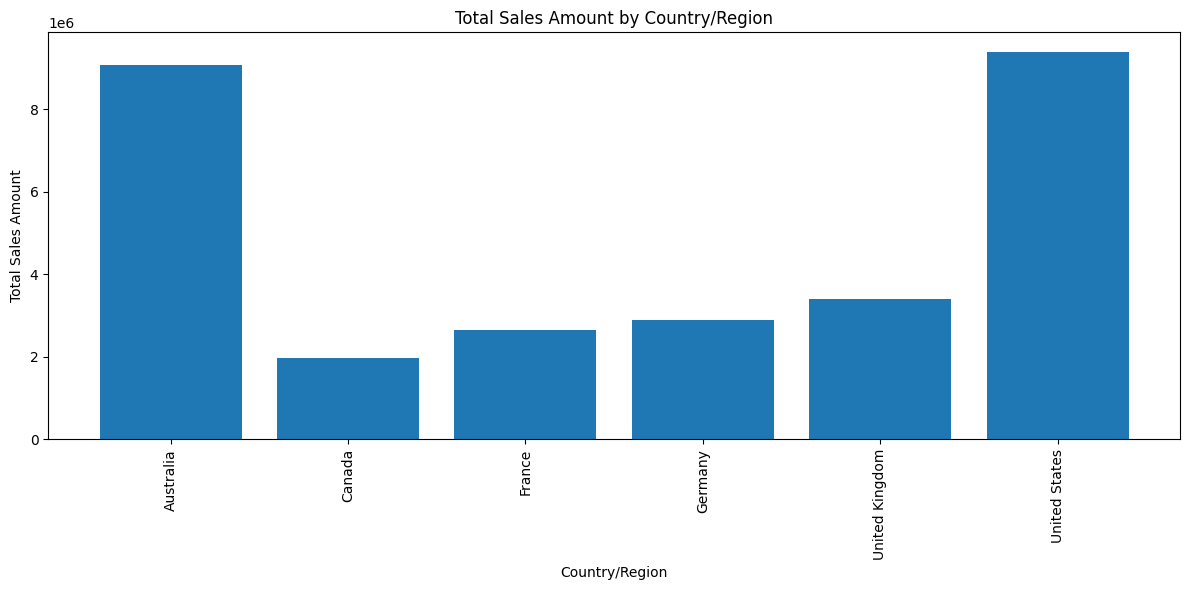

In [ ]:
# Convert the result to a DataFrame for better manipulation
total_sales_df = total_sales.reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(total_sales_df["EnglishCountryRegionName"], total_sales_df["SalesAmount"])
plt.xlabel("Country/Region")
plt.ylabel("Total Sales Amount")
plt.title("Total Sales Amount by Country/Region")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [ ]:
#total costs achieved per country region
total_product_cost = df.groupby("EnglishCountryRegionName")["TotalProductCost"].sum()
print(total_product_cost)

EnglishCountryRegionName
Australia        5375145.51
Canada           1147923.36
France           1557752.99
Germany          1706941.57
United Kingdom   2001221.43
United States    5488808.71
Name: TotalProductCost, dtype: float64


In [ ]:
#total revenue
revenue = total_sales - total_product_cost
print(revenue)

EnglishCountryRegionName
Australia        3685855.08
Canada            829921.50
France           1086264.72
Germany          1187370.77
United Kingdom   1390490.78
United States    3900980.80
dtype: float64


QUESTION #2
Generate summary statistics including min, max, and standard deviation for Yearly Income, Gender by Country Regions.

In [ ]:
ddf = df.groupby(["EnglishCountryRegionName", "Year"]).agg({'SalesAmount': 'sum'}).reset_index()
print(ddf)

   EnglishCountryRegionName  Year  SalesAmount
0                 Australia  2010     20909.78
1                 Australia  2011   2563732.25
2                 Australia  2012   2128407.46
3                 Australia  2013   4339443.38
4                 Australia  2014      8507.72
5                    Canada  2010      3578.27
6                    Canada  2011    571571.80
7                    Canada  2012    307604.52
8                    Canada  2013   1085632.65
9                    Canada  2014      9457.62
10                   France  2010      3399.99
11                   France  2011    410845.33
12                   France  2012    648065.54
13                   France  2013   1578511.80
14                   France  2014      3195.06
15                  Germany  2011    520500.16
16                  Germany  2012    608657.98
17                  Germany  2013   1761876.36
18                  Germany  2014      3277.83
19           United Kingdom  2010       699.10
20           

In [ ]:
dddf = ddf[["EnglishCountryRegionName", "SalesAmount"]]
print(dddf)

   EnglishCountryRegionName  SalesAmount
0                 Australia     20909.78
1                 Australia   2563732.25
2                 Australia   2128407.46
3                 Australia   4339443.38
4                 Australia      8507.72
5                    Canada      3578.27
6                    Canada    571571.80
7                    Canada    307604.52
8                    Canada   1085632.65
9                    Canada      9457.62
10                   France      3399.99
11                   France    410845.33
12                   France    648065.54
13                   France   1578511.80
14                   France      3195.06
15                  Germany    520500.16
16                  Germany    608657.98
17                  Germany   1761876.36
18                  Germany      3277.83
19           United Kingdom       699.10
20           United Kingdom    550591.22
21           United Kingdom    712700.96
22           United Kingdom   2124007.29
23           Uni

In [ ]:
df.groupby(["EnglishCountryRegionName"]).describe()

CustomerKey                                     \
                               count     mean     std      min      25%   
EnglishCountryRegionName                                                  
Australia                   13345.00 18773.80 5361.93 11000.00 14057.00   
Canada                       7620.00 16630.47 5111.00 11019.00 11857.00   
France                       5558.00 18996.34 5382.77 11241.00 14189.00   
Germany                      5625.00 19348.51 5260.10 11237.00 14803.00   
United Kingdom               6906.00 18645.10 5272.62 11238.00 14150.00   
United States               21344.00 19563.32 5479.68 11012.00 14494.00   

                                                    GeographyKey         ...  \
                              50%      75%      max        count   mean  ...   
EnglishCountryRegionName                                                 ...   
Australia                18240.00 23314.00 29465.00     13345.00  21.57  ...   
Canada                   15378.00 19987.00 29351.00      7620.00  57.62  ...   
France                   18032.00 23763.00 29483.00      5558.00 203.68  ...   
Germany                  19029.00 23960.00 29481.00      5625.00 147.62  ...   
United Kingdom           17783.50 22629.75 29480.00      6906.00 254.07  ...   
United States            19532.50 24419.00 29354.00     21344.00 444.09  ...   

                         CustomerPONumber         Year                       \
                                      75% max    count    mean  std     min   
EnglishCountryRegionName                                                      
Australia                             NaN NaN 13345.00 2012.82 0.56 2010.00   
Canada                                NaN NaN  7620.00 2012.99 0.41 2010.00   
France                                NaN NaN  5558.00 2012.91 0.44 2010.00   
Germany                               NaN NaN  5625.00 2012.90 0.45 2011.00   
United Kingdom                        NaN NaN  6906.00 2012.91 0.43 2010.00   
United States                         NaN NaN 21344.00 2012.92 0.47 2010.00   

                                                          
                             25%     50%     75%     max  
EnglishCountryRegionName                                  
Australia                2013.00 2013.00 2013.00 2014.00  
Canada                   2013.00 2013.00 2013.00 2014.00  
France                   2013.00 2013.00 2013.00 2014.00  
Germany                  2013.00 2013.00 2013.00 2014.00  
United Kingdom           2013.00 2013.00 2013.00 2014.00  
United States            2013.00 2013.00 2013.00 2014.00  

[6 rows x 240 columns]

AttributeError: ignored

QUESTION #3
What is the average price of the product category that generates the most sales?

In [ ]:
 #Hi sylvia this is Rose, this code might helo you to get how much each reagion has sold in terms of "units"
 #number of units sold per each country region
df.groupby(["EnglishCountryRegionName"]).count()

,CustomerKey,GeographyKey,City,CountryRegionCode,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
EnglishCountryRegionName,,,,,,,,,,,,,,,,,,,,,
Australia,13345,13345,13345,13345,13345,103,13345,7711,13345,13345,...,13345,13345,13345,13345,13345,0,0,13345,13345,13345
Canada,7620,7620,7620,7620,7620,8,7620,4416,7620,7620,...,7620,7620,7620,7620,7620,0,0,7620,7620,7620
France,5558,5558,5558,5558,5558,27,5558,3274,5558,5558,...,5558,5558,5558,5558,5558,0,0,5558,5558,5558
Germany,5625,5625,5625,5625,5625,52,5625,3222,5625,5625,...,5625,5625,5625,5625,5625,0,0,5625,5625,5625
United Kingdom,6906,6906,6906,6906,6906,64,6906,3993,6906,6906,...,6906,6906,6906,6906,6906,0,0,6906,6906,6906
United States,21344,21344,21344,21344,21344,53,21344,12287,21344,21344,...,21344,21344,21344,21344,21344,0,0,21344,21344,21344


In [ ]:
df['ProductCategory'] = df['EnglishProductName'].str.split('-').str[0].str.strip() #filter the categroies
df['EnglishProductName'] = df['EnglishProductName'].str.split(',').str[0].str.strip() #filter the categroies
df[['SalesAmount', 'EnglishProductName']].head()

,SalesAmount,EnglishProductName
ID,,
0,3399.99,Mountain
1,2319.99,Mountain
2,21.98,Fender Set
3,2384.07,Touring
4,28.99,Touring Tire


In [ ]:
sales_by_product_key = df.groupby('ProductCategory')['SalesAmount'].sum()
sorted_product_keys = sales_by_product_key.sort_values(ascending=False).reset_index()

In [ ]:
sorted_product_keys.head(5)

,ProductCategory,SalesAmount
0,Road,14520584.04
1,Mountain,9952759.56
2,Touring,3844801.05
3,Sport,225335.60
4,Long,86782.64


In [ ]:
data_road= df[df['ProductCategory']=='Road']
quantity1 = data_road['OrderQuantity'].sum()
quantity1

8068

In [ ]:
data_Mountain =df[df['ProductCategory']=='Mountain']
quantity2 = data_Mountain['OrderQuantity'].sum()
quantity2

In [ ]:
data_Touring =df[df['ProductCategory']=='Touring']
quantity3 = data_Touring['OrderQuantity'].sum()
quantity3

In [ ]:
data_Sport =df[df['ProductCategory']=='Sport']
quantity4 = data_Sport['OrderQuantity'].sum()
quantity4

In [ ]:
data_Long =df[df['ProductCategory']=='Long']
quantity5 = data_Long['OrderQuantity'].sum()
quantity5

In [ ]:
region_sales=df.groupby(['EnglishCountryRegionName', 'ProductCategory'])['SalesAmount'].sum()
sorted_region_sales = region_sales.groupby('EnglishCountryRegionName', group_keys=False).nlargest(3).reset_index()
sorted_region_sales

,EnglishCountryRegionName,ProductCategory,SalesAmount
0,Australia,Road,5004548.42
1,Australia,Mountain,2853819.45
2,Australia,Touring,993682.14
3,Canada,Road,935616.29
4,Canada,Mountain,615440.40
5,Canada,Touring,270245.70
6,France,Road,1311933.10
7,France,Mountain,899260.71
8,France,Touring,342381.90
9,Germany,Road,1380342.85


In [ ]:
#yearly sales
yearly_sales = df.groupby(['Year', 'ProductCategory'])['SalesAmount'].sum()
top_product_per_year = yearly_sales.groupby('Year').idxmax()
top_sales_per_year = yearly_sales.groupby('Year').max()

In [ ]:
result = pd.DataFrame({
    'Year': top_product_per_year.index,
    'Top Product': [idx[1] for idx in top_product_per_year.values],
    'Sales Amount': top_sales_per_year.values
})
result

,Year,Top Product,Sales Amount
0,2010,Road,26446.09
1,2011,Road,5743161.12
2,2012,Road,3554883.92
3,2013,Mountain,6339999.28
4,2014,Sport,8397.60


In [ ]:
#List of product categories of interest
categories_of_interest = ['Road', 'Mountain', 'Touring', 'Sport', 'Long']
filtered_df = df[df['ProductCategory'].isin(categories_of_interest)]
yearly_sales_by_category = filtered_df.groupby(['Year', 'ProductCategory'])['SalesAmount'].sum()
yearly_sales_by_category_reset = yearly_sales_by_category.reset_index()


In [ ]:
pivot_sales = yearly_sales_by_category_reset.pivot(index='Year', columns='ProductCategory', values='SalesAmount')
pivot_sales.fillna(0)

ProductCategory,Long,Mountain,Road,Sport,Touring
Year,,,,,
2010,0.00,16974.95,26446.09,0.00,0.00
2011,0.00,1332364.80,5743161.12,0.00,0.00
2012,199.96,2263420.53,3554883.92,909.74,21390.87
2013,82483.50,6339999.28,5196092.90,216028.26,3823410.18
2014,4099.18,0.00,0.00,8397.60,0.00


QUESTION #4
Does owning a home make a difference in sales? Explain your analysis.

In [ ]:
import scipy.stats as stats

In [ ]:
df['HouseOwnerFlag'].describe()
# about 69.04% of people in our dataset own a house

count    60398.000000
mean         0.690404
std          0.462331
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HouseOwnerFlag, dtype: float64

In [ ]:
house_sales = df[df['HouseOwnerFlag'] == 1]
nohouse_sales = df[df['HouseOwnerFlag'] == 0]

In [ ]:
print(house_sales['SalesAmount'].mean(),nohouse_sales['SalesAmount'].mean())

488.86903273459785 479.88274371356755


In [ ]:
import seaborn as sns

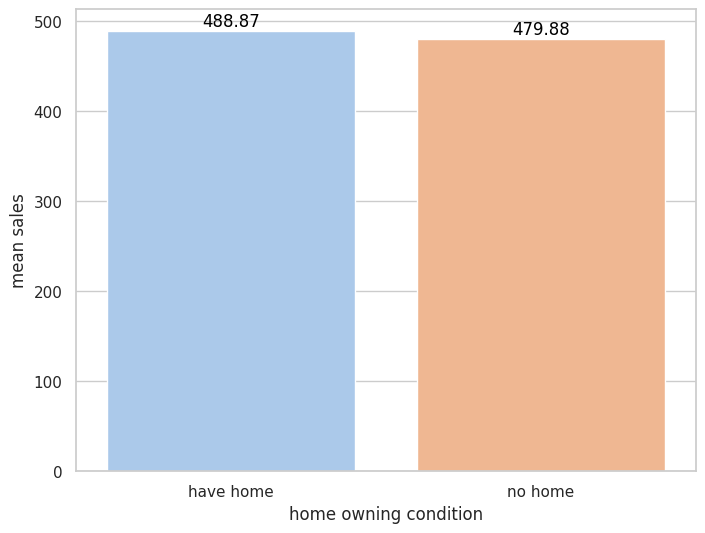

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

labels = ['have home', 'no home']
heights = [house_sales['SalesAmount'].mean(), nohouse_sales['SalesAmount'].mean()]

fig = sns.barplot(x=labels, y=heights, palette="pastel")

plt.xlabel('home owning condition')
plt.ylabel('mean sales')

for i, v in enumerate(heights):
    fig.text(i, v + 1, f"{v:.2f}", color='black', ha='center', va='bottom')

plt.show()

In [ ]:
data = [house_sales['SalesAmount'], nohouse_sales['SalesAmount']]

In [ ]:
f_stat, p_value = stats.f_oneway(*data)
f_stat

1.2092869702127982

In [ ]:
p_value
#fail to reject the null hypothesis

0.27147776482296737

In [ ]:
countries = df['EnglishCountryRegionName'].unique()

In [ ]:
for x in countries:
    country_data = df[df['EnglishCountryRegionName'] == x]

    house_sales = country_data[country_data['HouseOwnerFlag'] == 1]['SalesAmount']
    nohouse_sales = country_data[country_data['HouseOwnerFlag'] == 0]['SalesAmount']

    f_stat, p_value = stats.f_oneway(house_sales, nohouse_sales)

    print(f"For {x}, F-statistic: {f_stat}, p-value: {p_value}")

# in Germany, UK and France, owning a house can make a significant difference in sales

For Australia, F-statistic: 0.7817820654967125, p-value: 0.37661260579679245
For United States, F-statistic: 1.087912067172125, p-value: 0.2969461050836223
For Canada, F-statistic: 0.3791386133398688, p-value: 0.5380829920794066
For Germany, F-statistic: 17.375813795297024, p-value: 3.113107951743326e-05
For United Kingdom, F-statistic: 13.717818216623536, p-value: 0.00021408759455727105
For France, F-statistic: 26.827997455445136, p-value: 2.3023424826668575e-07
